# The RBM flow and the Critical Temperature of Ising Models

This is the notebook for the paper X.

Firstly, we import the necessary Python packages.

In [9]:
import pandas as pd
import numpy as np
import torch

from MC_Ising2D import IsingMC
torch.manual_seed(12)

## Loading Ising data

The first step is to load the Ising data generated by Monte Carlo procedure. The file `data/L100_1000sweeps.pkl` was constructed considering a square lattice $L\times L$, with $L=100$. There are 1000 spins configurations for each of 29 different temperatures $ T/J = 1, 1.1, 1.2, ..., 3.5 $ and $ T/J = 2.259, 2.269, 2.279$.

In [7]:
ising_data = pd.read_pickle('data/L100_Ising2D_MC.pkl')
ising_data.head()

,energy,magn,state,temp
0,-6656,176,"[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...",3.5
1,-6872,-248,"[1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, ...",3.5
2,-6812,544,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...",3.5
3,-6616,-166,"[0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, ...",3.5
4,-6660,-68,"[0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...",3.5


In [8]:
ising_data['temp'].value_counts()

2.279185    1000
1.600000    1000
3.000000    1000
2.000000    1000
1.500000    1000
1.000000    1000
3.200000    1000
2.259185    1000
2.300000    1000
2.269185    1000
1.100000    1000
1.800000    1000
1.400000    1000
1.700000    1000
2.200000    1000
2.900000    1000
2.400000    1000
1.900000    1000
3.400000    1000
1.200000    1000
2.500000    1000
3.100000    1000
2.100000    1000
2.800000    1000
2.600000    1000
2.700000    1000
1.300000    1000
3.300000    1000
3.500000    1000
Name: temp, dtype: int64

In the thermodynamic limit $( L^2 \rightarrow \infty )$, the isotropic Ising model in a square lattice was analytically solved by [Lars Onsager](https://en.wikipedia.org/wiki/Lars_Onsager) in [1944](https://journals.aps.org/pr/abstract/10.1103/PhysRev.65.117). In this limit, the model show spontaneous magnetization for $ T < T_c$, with $T_c$ given by 

$$ \frac{T_c}{J} = \frac{2}{\log\left(1 + \sqrt{ 2}\right)} \approx 2.269185  \;. $$

The temperatures values near $ T_c$ were included in the dataset just to get a better visualization (which is a sanity check) of the Monte Carlo results for thermodynamics quantities. They are not necessary for the present discussion, as pointed out by the paper [Scale-invariant Feature Extraction of Neural Network and Renormalization Group Flow](https://arxiv.org/abs/1801.07172).

Method fit will construct states to the following temperatures: 
[3.5        3.4        3.3        3.2        3.1        3.
 2.9        2.8        2.7        2.6        2.5        2.4
 2.3        2.27918531 2.26918531 2.25918531 2.2        2.1
 2.         1.9        1.8        1.7        1.6        1.5
 1.4        1.3        1.2        1.1        1.        ]


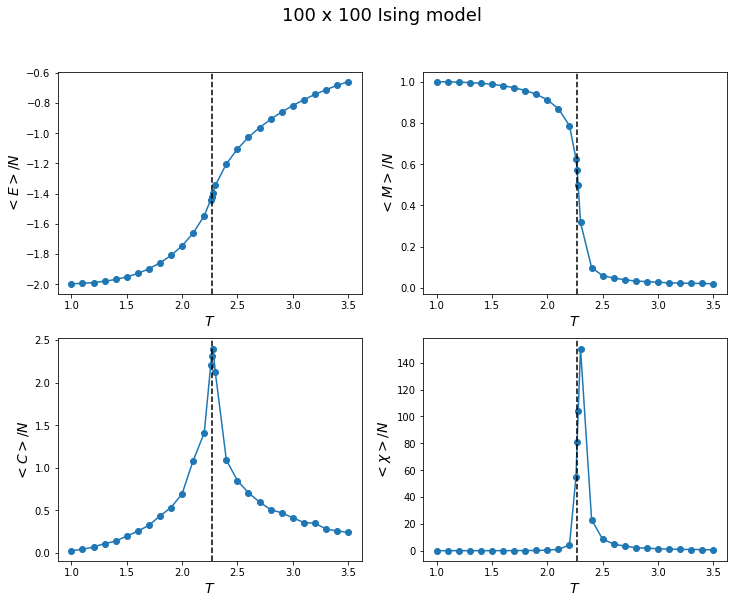

In [11]:
IsingMC(L= 100).plot_thermodynamics(spin_MC= ising_data, Tc_scaled= False)

## Neural Network Thermometer